# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi

## Desarrollo del Modelo.


-Formulación del Problema . - Determina el objeto de la simulación. Se deben especificar claramente estos elementos:

Resultados que se esperan del simulador Se espera que aplicando los modelos matematicos de simulacion(modelo lineal y modelo logistico), estos nos ayuden a aproximarnos mas sobre estadisticas en los proximos meses sobre el covid.
Plan de experimentación Se establece como plan, realizar una recopilacion de la informacacion desde un csv, y luego en un cuaderno de python hacer los respectivos simulaciones.
Variables de interés Las variables de interes son el total que obtendremos en el calculo del modelo lineal y el modelo logistico, estas presentan un calculo que nos serviria para tener una idea proxima de eventos a ocurrir en la pandemia.
Tipo de perturbaciones a estudiar El desconocimiento de librerias para poder llevar a cabo el analisis y las variaciones de datos que no son exactos.
Tratamiento estadístico de los resultados Para ver de mejor manera estos valores se mandaran a graficar.
Complejidad del interfaz del simulador No contiene como tal una interfaz pero, se deden presentar conocimeintos basicos en python.
Definición del sistema . - El sistema que se simulará debe estar definido perfectamente. Se debe establecer donde estará la frontera de interacción entre el sistema a estudiar y el medioambiente.  



### 3- Colección de datos

La collección de datos que se empleara para el desarrollo del módelo son datos actuales a la fecha de 04/11/2020, cabe recalcar que los datos usados estan en constante actualización ya que es una coleccion de datos a nivel mundial, en donde podemos encontrar a ecuador.

Para mas informacion podemos ir a: https://github.com/owid/covid-19-data

In [14]:
df = pd.read_csv('owid-covid-data.csv').fillna(0) 
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
15026,ECU,South America,Ecuador,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15027,ECU,South America,Ecuador,2020-03-02,6.0,5.0,0.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15028,ECU,South America,Ecuador,2020-03-03,7.0,1.0,1.000,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15030,ECU,South America,Ecuador,2020-03-05,10.0,3.0,1.429,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15031,ECU,South America,Ecuador,2020-03-06,13.0,3.0,1.857,0.0,0.0,0.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,ECU,South America,Ecuador,2020-11-07,172508.0,725.0,765.857,12761.0,31.0,18.429,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15278,ECU,South America,Ecuador,2020-11-08,173486.0,978.0,756.286,12815.0,54.0,20.714,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15279,ECU,South America,Ecuador,2020-11-09,174907.0,1421.0,816.143,12830.0,15.0,20.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
15280,ECU,South America,Ecuador,2020-11-10,175269.0,362.0,815.286,12839.0,9.0,21.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752


Interpretación
El modelo con respecto a los parametros de mayor incentidumbre no son uy exactos debido a que los datos del covid varian en muchos ambitos porque pueden variar de un dia para otro, los modelos empleados en este desarrollo son el Lineal y el Logístico, de los cuales el modelo que mas se adapta ala curva de contagio y muertes es el Modelos Lineal con su respectiva regresion, en cambio el logistico no se adapta de la mejor manera a la curva de sucesion del covid ya que el logistico representa una curva muy pronunciada r4especto al covid.

# Modelo Lineal

w = 738.7116160121419, b = -20472.994294820717
y = 738.7116160121419x -20472.994294820717


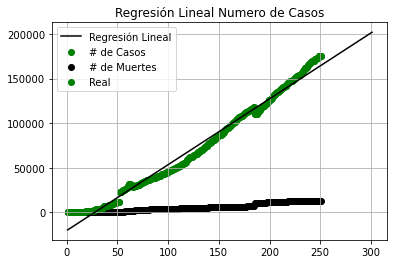

w = 58.0323081009296, b = -1836.2979123505957
y = 58.0323081009296x -1836.2979123505957


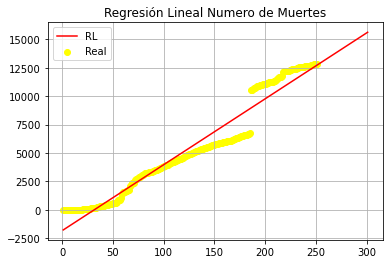

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):  
    np.random.seed(42) 
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv('owid-covid-data.csv').fillna(0) 
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1) 
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

plt.scatter(x,y,label='# de Casos', color='green')
plt.scatter(x,y1,label='# de Muertes', color='black')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

regresion_lineal = LinearRegression() 

regresion_lineal.fit(x.reshape(-1,1), y) 
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
#plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='green')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+51,1)
plt.plot(x1,fun(x1),color='black',label='Regresión Lineal')
plt.legend()
plt.show()

regresion_lineal = LinearRegression() 
regresion_lineal.fit(x.reshape(-1,1), y1) 
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.scatter(x,y1,label='Real', color='yellow')
plt.grid(True)
plt.title('Regresión Lineal Numero de Muertes');
x2 = np.arange(1,len(ndf1)+51,1)
plt.plot(x2,fun(x2),color='red',label='RL')
plt.legend()
plt.show()

# Modelo Logística

(array([-139418.21968208,   46699.81937434]), array([[ 84876808.72596902, -17896201.08634508],
       [-17896201.08634508,   3941788.34758305]]))

(array([-10970.99926502,   3622.5394974 ]), array([[ 619139.23512667, -130544.96786689],
       [-130544.96786689,   28753.62382701]]))


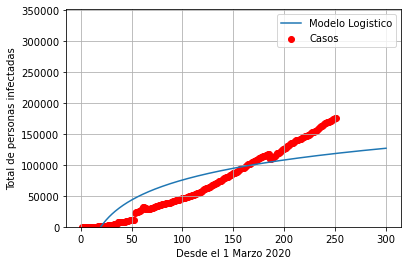

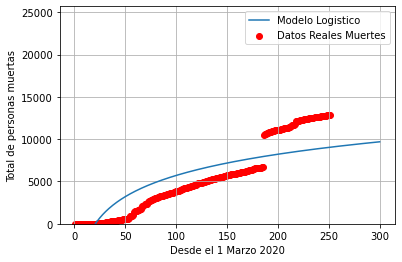

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('owid-covid-data.csv').fillna(0)
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1)
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) 
exp_fit1 = curve_fit(modelo_logistico,x,y1) 

print(exp_fit)
print("")
print(exp_fit1)

pred_x = list(range(min(x),max(x)+50))
plt.scatter(x,y,label="Casos",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.grid(True)
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) 
plt.show()

plt.scatter(x,y1,label="Datos Reales Muertes",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.grid(True)
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas muertas")
plt.ylim(0,max(y1)*2)
plt.show()

Verificación . - En esta etapa se verifica que no se hayan cometido errores durante la implementación del modelo. Se usan herramientas de ejecución por pasos (debugging).


Diseño de experimentos . - Se especifica las características de los experimentos a realizar: tiempo de arranque, tiempo de simulación y número de simulaciones. No se debe incluir la elaboración del conjunto de alternativas a probar para seleccionar la mejor, ya que esto es tarea de la optimización.

Para el diseño de los experimentos, se aplica dos modelos el lineal y el modelo logistico, estos modelos, nos ayudan a determinar tiempos y simular en este caso cuantos casos positivos tendriamos en x cantidad de dias. Para medir el tiempo de simulación y número de simulaciones y tiempo de arranque se hace uso de



Interpretación . - Se analiza la sensibilidad del modelo con respecto a los parámetros con mayor incertidumbre.

La aplicacion del modelo lineal y logistico de puede ver que, que son modelos que se ajustan a la prediccion pero en si es algo bastante subjetivo, debido a que los datos pueden variar, pero estos datos estan basados en un archivo csv, el cual contiene datos estadisticos de casos posivitos de covid, tambien posee totales de contagios, de pruebas pcr, total de muertes, etc.

Implementación . - Se entrega la solución al cliente y se lo capacita en su uso.

Como se puede evidenciar, se ha ido aplicando los pasos para realizar un ejemplo de analisis de casos por covid, estos casos estan analizados aplicando dos algoritmos el de regresion lineal, y el modelo logistico, para dicho analisis se a tomado en cuenta un conjunto de datos que sirve para

Documentación . - Constamos con la elabarocion del cuaderno.